## 3本のスロットマシン問題

#### 状況
- エージェントは３本のスロットマシンを前にしています
- 各スロットマシンには異なる確率で報酬(+1)が出ます

    | マシンの種類 | 報酬が出る確率 |
    | :---         | :---           |
    |A | 0.2 |
    |B | 0.5 |
    |C | 0.8 |

#### エージェントの目的
- できるだけ多くの報酬を得ること
- どのマシンが一番報酬を得られるかを学習していく

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib


## Q値の更新ルール
#### 状況
- 各マシンの行動に対して、エージェントは「そのマシンの価値(Q値)」を保持している
- 経験を重ねながら、このQ値を少しずつ**本当の期待値に近づける**ことが目的

#### 更新式
$Q_{new}(a) = Q_{old}(a) + \alpha \times (r-Q_{old}(a))$
- 今の評価に**新しい経験との差分**を少しだけ加えて更新する


In [2]:
REWARD = 1
MACHINE_TYPE = ['A', 'B', 'C']

# マシンの報酬をランダムに発生させる関数
def get_reward(machine_type: str):
    if machine_type=='A':
        return np.random.choice([0, REWARD], p=[0.8, 0.2])
    elif machine_type=='B':
        return np.random.choice([0, REWARD], p=[0.5, 0.5])
    elif machine_type=='C':
        return np.random.choice([0, REWARD], p=[0.2, 0.8])
    else:
        print(f'{machine_type} is not be able to use as args...')
        return None

# ε-greedyでマシンを選ぶ関数
def choice_machine(q_table, ipsilon=0.2)-> str: 
    # 探索
    if np.random.rand() < ipsilon:
        return np.random.choice(MACHINE_TYPE)
    # 活用
    else:
        return max(q_table, key=q_table.get)

# Q値の更新ルール
def update_q(q_table:list, machine_type:str, reward:int, lr=0.05)->dict:
    q_table[machine_type] += lr * (reward - q_table[machine_type])
    return q_table 


{'A': np.float64(0.4149371252944179), 'B': np.float64(0.327737690848342), 'C': np.float64(0.8930978391956648)}
{'A': 48, 'B': 29, 'C': 423}


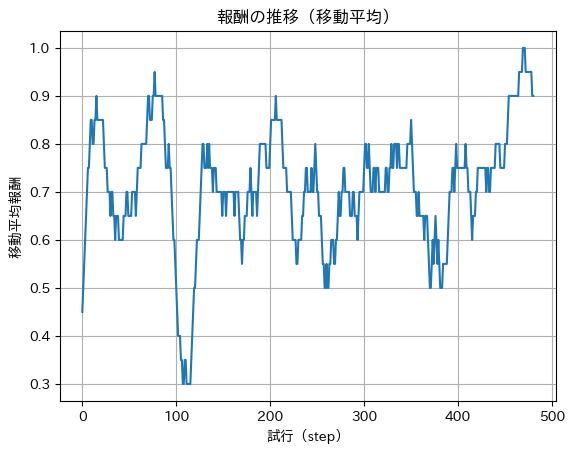

In [6]:
# q-tableの初期化
q_table = { 'A': 0.0, 'B': 0.0, 'C': 0.0 }
# ハイパパラメータ
steps = 500
ipsilon = 0.2
lr = 0.05


# 学習確認用
rewards = []
counts_machine = {'A': 0, 'B': 0, 'C': 0}

for i in range(steps):
    # マシンの選択
    machine_type = choice_machine(q_table=q_table,
                                  ipsilon=ipsilon)

    # 報酬獲得
    is_reward = get_reward(machine_type=machine_type)

    # Q-tableの更新
    q_table = update_q(q_table=q_table, 
                       machine_type=machine_type, 
                       reward=is_reward, 
                       lr=lr)

    # データ格納
    rewards.append(is_reward)
    counts_machine[machine_type] += 1

print(q_table)
print(counts_machine)

# 報酬の可視化
window = 20
moving_avg = np.convolve(rewards, np.ones(window)/window, mode='valid')

plt.plot(moving_avg)
plt.xlabel("試行（step）")
plt.ylabel("移動平均報酬")
plt.title("報酬の推移（移動平均）")
plt.grid()
plt.show()

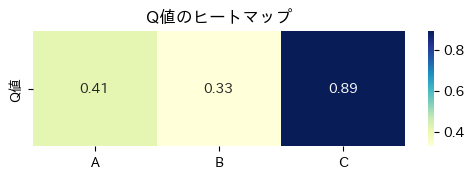

In [9]:


def plot_q_heatmap(q_table):
    machines = list(q_table.keys())
    q_values = list(q_table.values())
    
    # Seabornスタイルで棒グラフ風ヒートマップ
    plt.figure(figsize=(6, 1.5))
    sns.heatmap([q_values], annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=machines, yticklabels=["Q値"])
    
    plt.title("Q値のヒートマップ")
    plt.show()

plot_q_heatmap(q_table)